### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación




Facturación por Tienda:
     Tienda   Facturación
0  Tienda 1  1.212258e+09
1  Tienda 2  1.175829e+09
2  Tienda 3  1.156536e+09
3  Tienda 4  1.093693e+09

Facturación Total de Todas las Tiendas: 4638316200.0


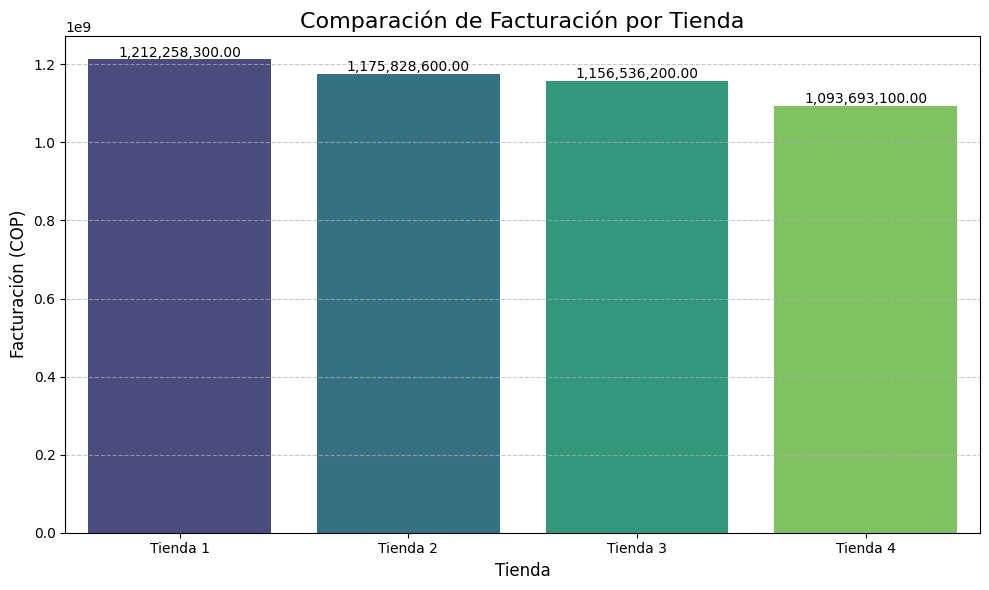

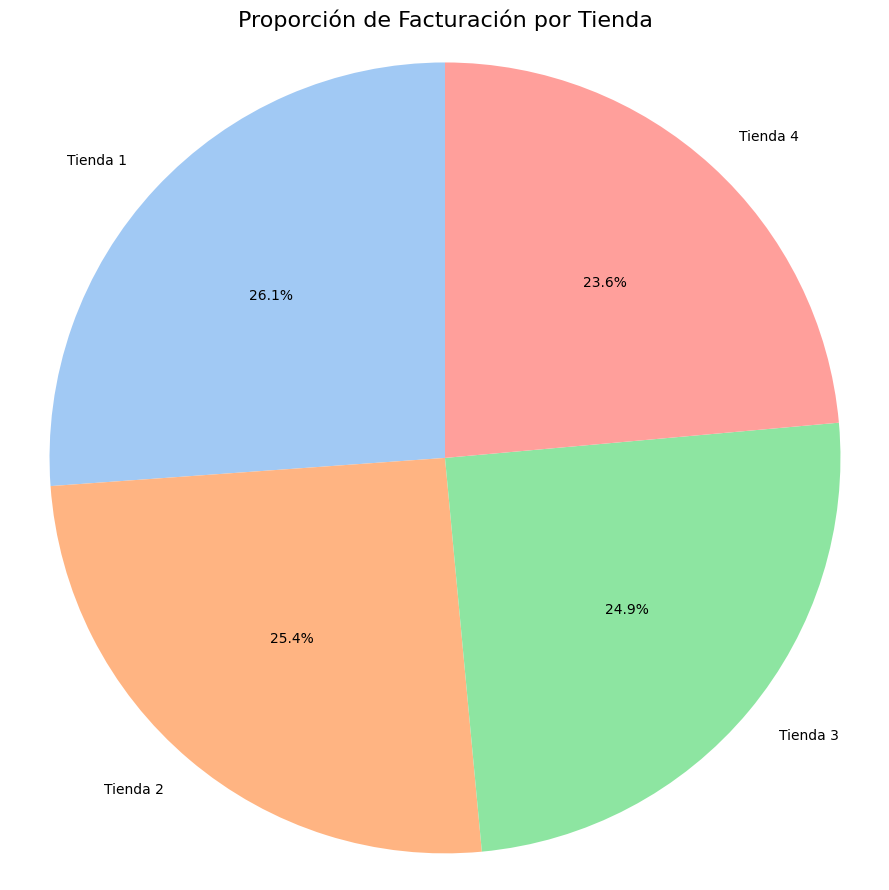

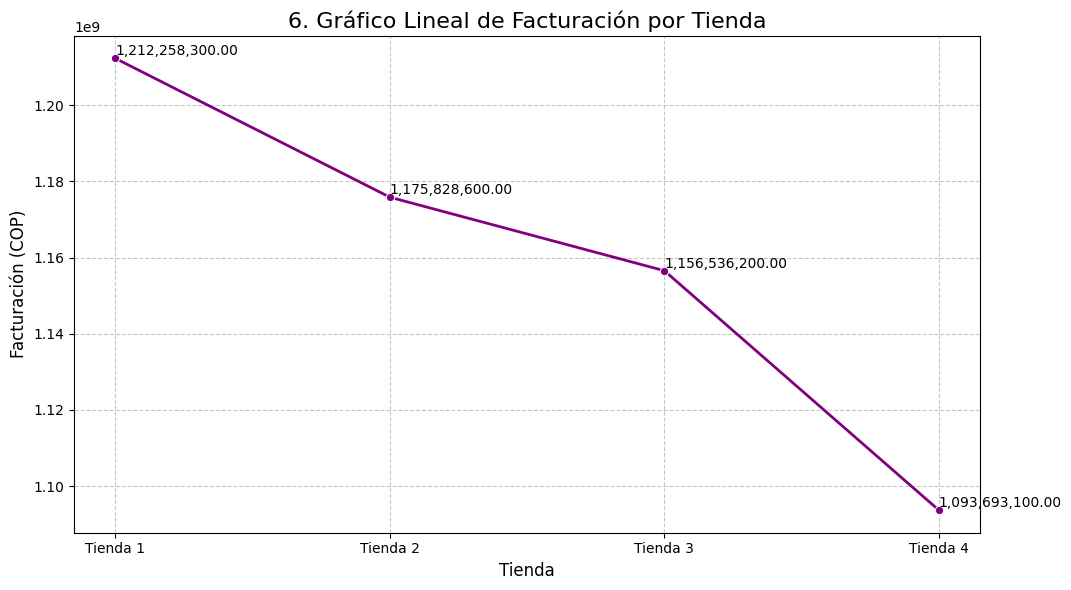

In [20]:
# Facturación por cada tienda
facturacion_tienda1 = tienda1['Precio'].sum() + tienda1['Costo de envío'].sum()
facturacion_tienda2 = tienda2['Precio'].sum() + tienda2['Costo de envío'].sum()
facturacion_tienda3 = tienda3['Precio'].sum() + tienda3['Costo de envío'].sum()
facturacion_tienda4 = tienda4['Precio'].sum() + tienda4['Costo de envío'].sum()
facturacion_todaslastiendas = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4

# data frame facturación por tienda
data_facturacion = {
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Facturación': [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
    }
df_facturacion = pd.DataFrame(data_facturacion)
print("\nFacturación por Tienda:")
print(df_facturacion)
print(f"\nFacturación Total de Todas las Tiendas: {facturacion_todaslastiendas}")

# Gráfico de barras de facturación individual con etiquetas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Facturación', hue='Tienda', data=df_facturacion, palette='viridis')
plt.title('Comparación de Facturación por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación (COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Añadir la cantidad de facturación a cada barra
for p in ax.patches:
  ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


# Gáfico pastel de proporción de facturación
plt.figure(figsize=(9, 9))
plt.pie(df_facturacion['Facturación'], labels=df_facturacion['Tienda'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proporción de Facturación por Tienda', fontsize=16)
plt.axis('equal') # Asegura que el pastel sea un círculo.
plt.tight_layout()
plt.show()


# Gráfico lineal facturación tienda
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tienda', y='Facturación', data=df_facturacion, marker='o', color='purple', linewidth=2)
plt.title('6. Gráfico Lineal de Facturación por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación (COP)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Añadir la cantidad de facturación a cada punto
for x, y in zip(df_facturacion['Tienda'], df_facturacion['Facturación']):
  plt.text(x, y, f'{y:,.2f}', ha='left', va='bottom', fontsize=10)

plt.show()






# 2. Ventas por categoría


Ventas por Categoría por Tienda:
    Categoría del Producto       Precio    Tienda
0  Artículos para el hogar   12698400.0  Tienda 1
1     Deportes y diversión   39290000.0  Tienda 1
2        Electrodomésticos  363685200.0  Tienda 1
3             Electrónicos  429493500.0  Tienda 1
4   Instrumentos musicales   91299000.0  Tienda 1
5                 Juguetes   17995700.0  Tienda 1
6                   Libros    8784900.0  Tienda 1
7                  Muebles  187633700.0  Tienda 1
0  Artículos para el hogar   14746900.0  Tienda 2
1     Deportes y diversión   34744500.0  Tienda 2
2        Electrodomésticos  348567800.0  Tienda 2
3             Electrónicos  410831100.0  Tienda 2
4   Instrumentos musicales  104990300.0  Tienda 2
5                 Juguetes   15945400.0  Tienda 2
6                   Libros   10091200.0  Tienda 2
7                  Muebles  176426300.0  Tienda 2
0  Artículos para el hogar   15060000.0  Tienda 3
1     Deportes y diversión   35593100.0  Tienda 3
2        Electro

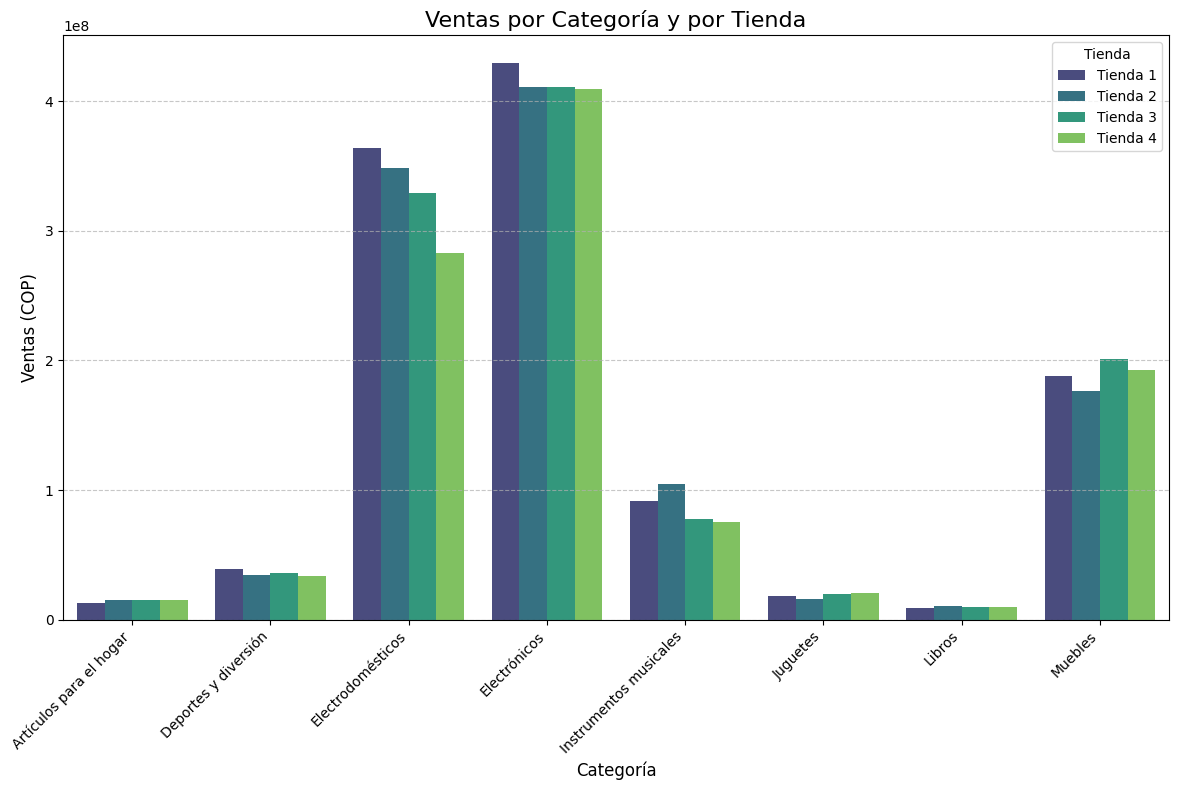

In [7]:
# Ventas por categoría por tienda
ventas_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda1['Tienda'] = 'Tienda 1'

ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda2['Tienda'] = 'Tienda 2'

ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda3['Tienda'] = 'Tienda 3'

ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda4['Tienda'] = 'Tienda 4'

# Concatenar los resultados de todas las tiendas
ventas_por_categoria_por_tienda = pd.concat([ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4])

print("\nVentas por Categoría por Tienda:")
print(ventas_por_categoria_por_tienda)

# Opcional: Visualización de las ventas por categoría por tienda
plt.figure(figsize=(12, 8))
sns.barplot(x='Categoría del Producto', y='Precio', hue='Tienda', data=ventas_por_categoria_por_tienda, palette='viridis')
plt.title('Ventas por Categoría y por Tienda', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ventas (COP)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Calificación promedio de la tienda 1:  3.976685036032217
Calificación promedio de la tienda 2:  4.037303942348453
Calificación promedio de la tienda 3:  4.048325561678677
Calificación promedio de la tienda 4:  3.9957591178965224


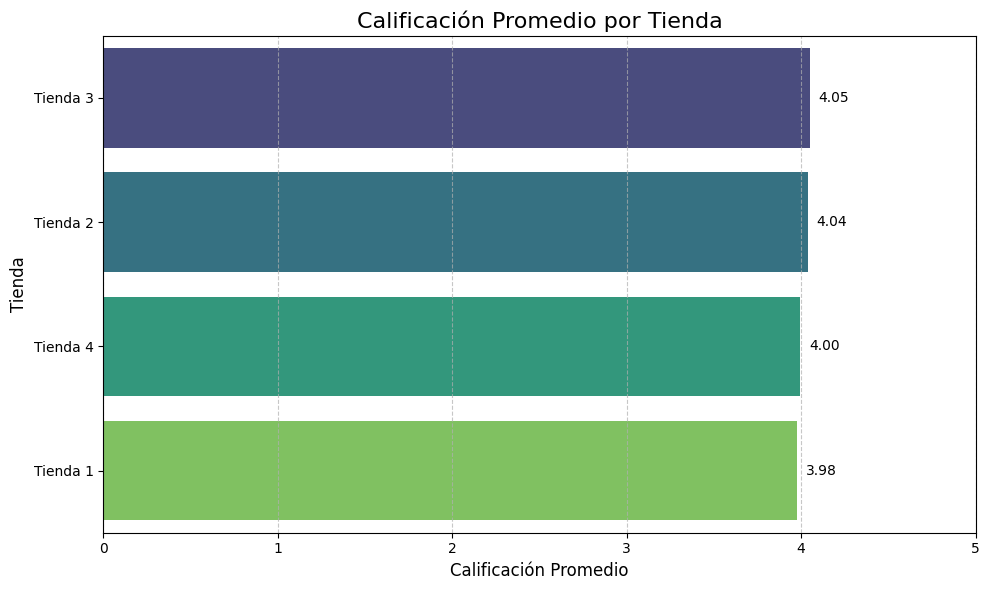

Gráfico de barras de calificación promedio por tienda (ejes invertidos y valores en barras) generado.


In [33]:
# Calificación promedio por tienda
calificacion_promedio_tienda1 = tienda1['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print('Calificación promedio de la tienda 1: ',calificacion_promedio_tienda1)
print('Calificación promedio de la tienda 2: ',calificacion_promedio_tienda2)
print('Calificación promedio de la tienda 3: ',calificacion_promedio_tienda3)
print('Calificación promedio de la tienda 4: ',calificacion_promedio_tienda4)


data_calificaciones = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
}

df_calificaciones = pd.DataFrame(data_calificaciones)

# Ordenar por calificación promedio de mayor a menor
df_calificaciones_ordenado = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False)


# Visualización de las calificaciones promedio con valores en las barras y ejes invertidos
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Calificación Promedio', y='Tienda', hue='Tienda', data=df_calificaciones_ordenado, palette='viridis', orient='h')
plt.title('Calificación Promedio por Tienda', fontsize=16)
plt.xlabel('Calificación Promedio', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 5) # Asumiendo que la calificación es de 1 a 5

# Añadir valores en las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height()/2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()
plt.show()
print("Gráfico de barras de calificación promedio por tienda (ejes invertidos y valores en barras) generado.")

# 4. Productos más y menos vendidos


Productos Más y Menos Vendidos en Tienda 1:
Productos Más Vendidos (Ordenados de mayor a menor):
            Producto       Precio
48     TV LED UHD 4K  142150200.0
39      Refrigerador  112143300.0
25         Iphone 15   97902200.0
45          Smart TV   67452100.0
28  Lavadora de ropa   65783600.0

Productos Menos Vendidos (Ordenados de mayor a menor):
              Producto     Precio
0    Ajedrez de madera  1430600.0
42        Set de vasos  1359100.0
16     Cubo mágico 8x8   696900.0
19      Dinosaurio Rex   688900.0
17  Cuerda para saltar   652800.0

Productos Más y Menos Vendidos en Tienda 2:
Productos Más Vendidos (Ordenados de mayor a menor):
            Producto       Precio
25         Iphone 15  113225800.0
48     TV LED UHD 4K  103375000.0
39      Refrigerador   97632500.0
28  Lavadora de ropa   66762300.0
45          Smart TV   61142000.0

Productos Menos Vendidos (Ordenados de mayor a menor):
              Producto     Precio
42        Set de vasos  1542600.0
0    Ajedrez

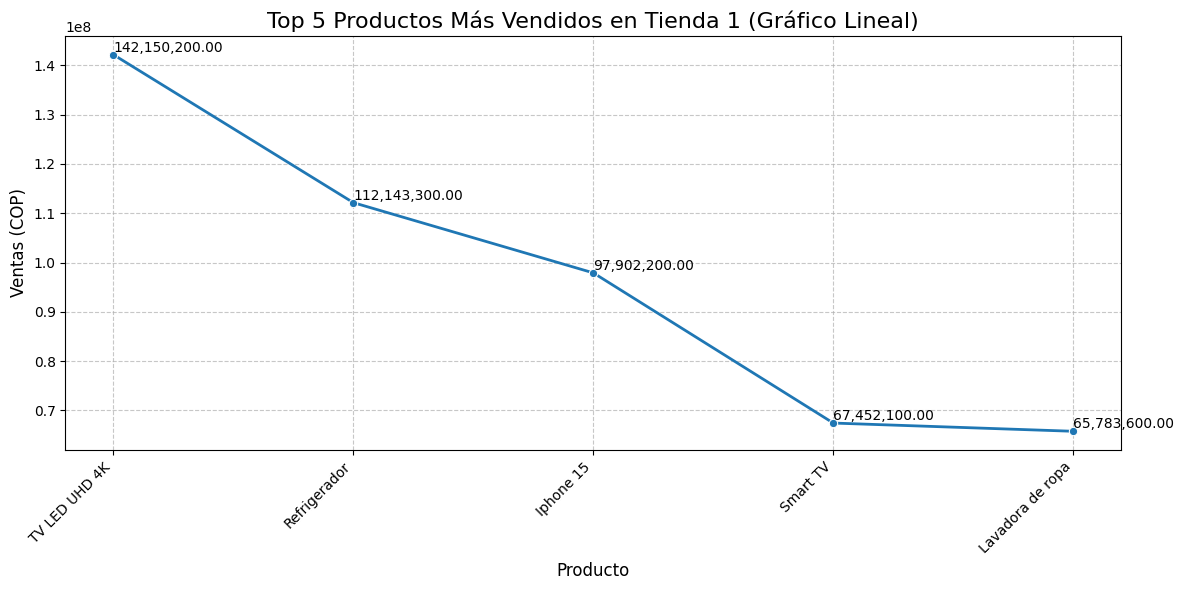

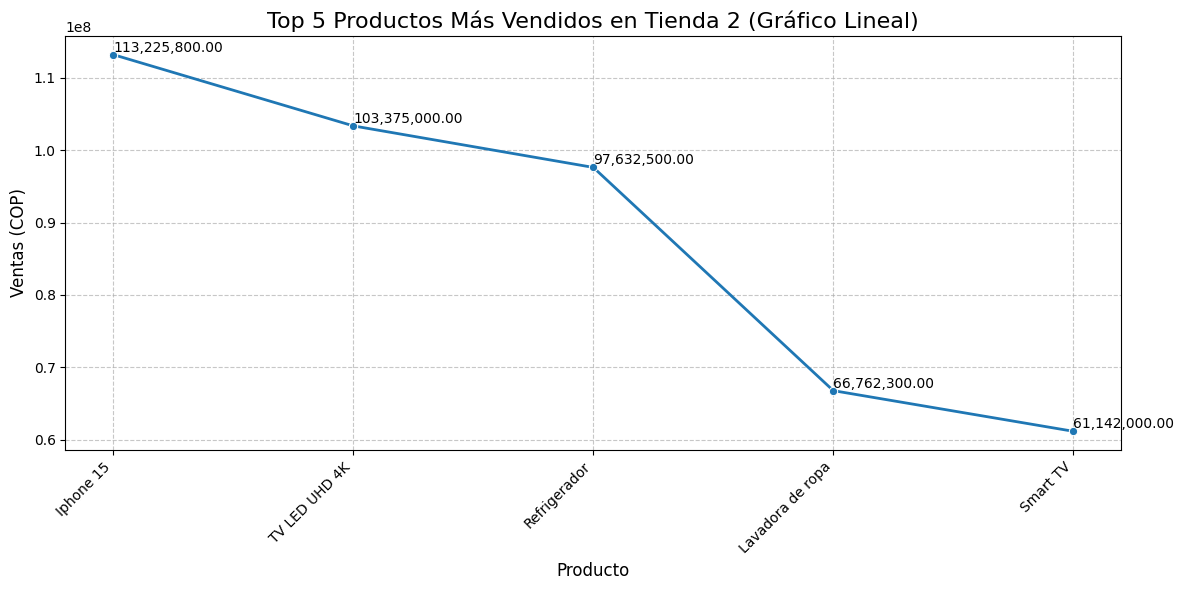

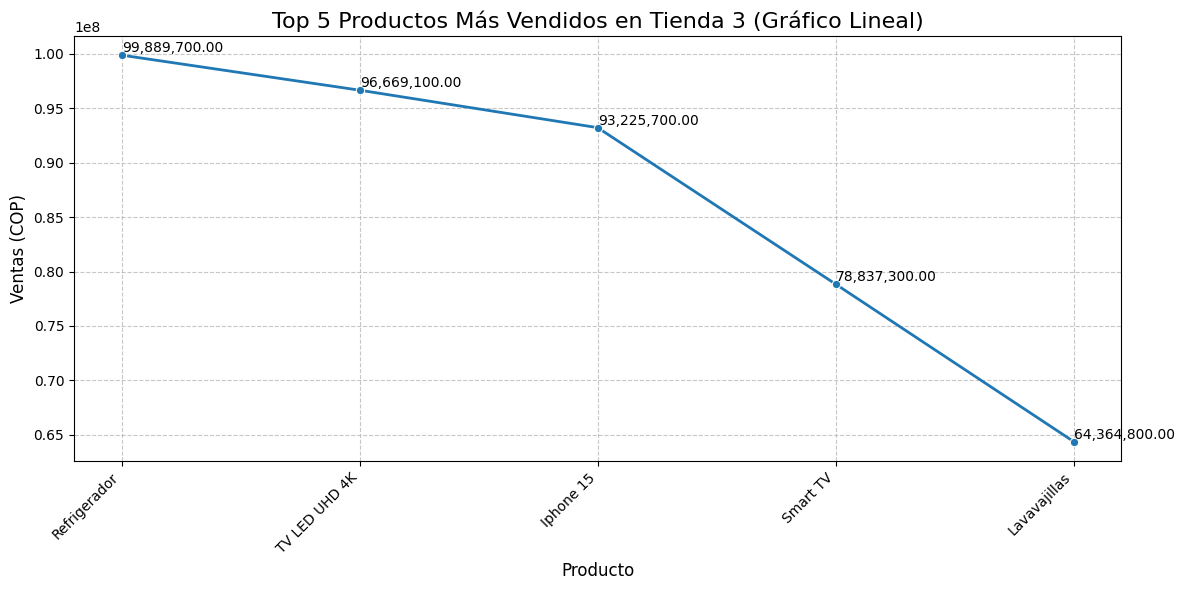

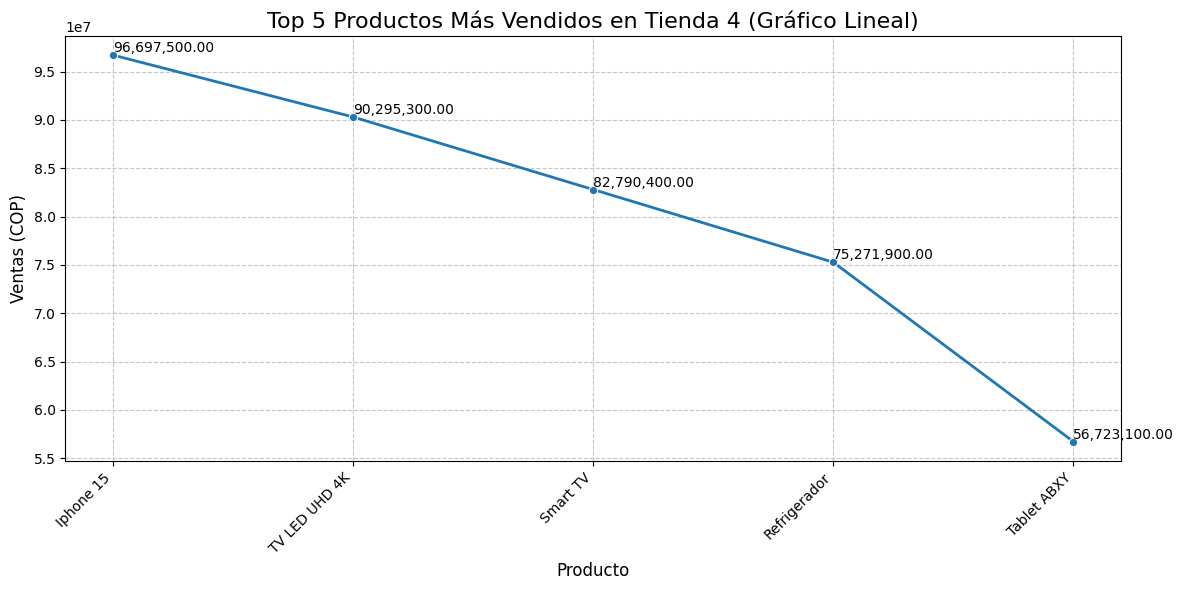

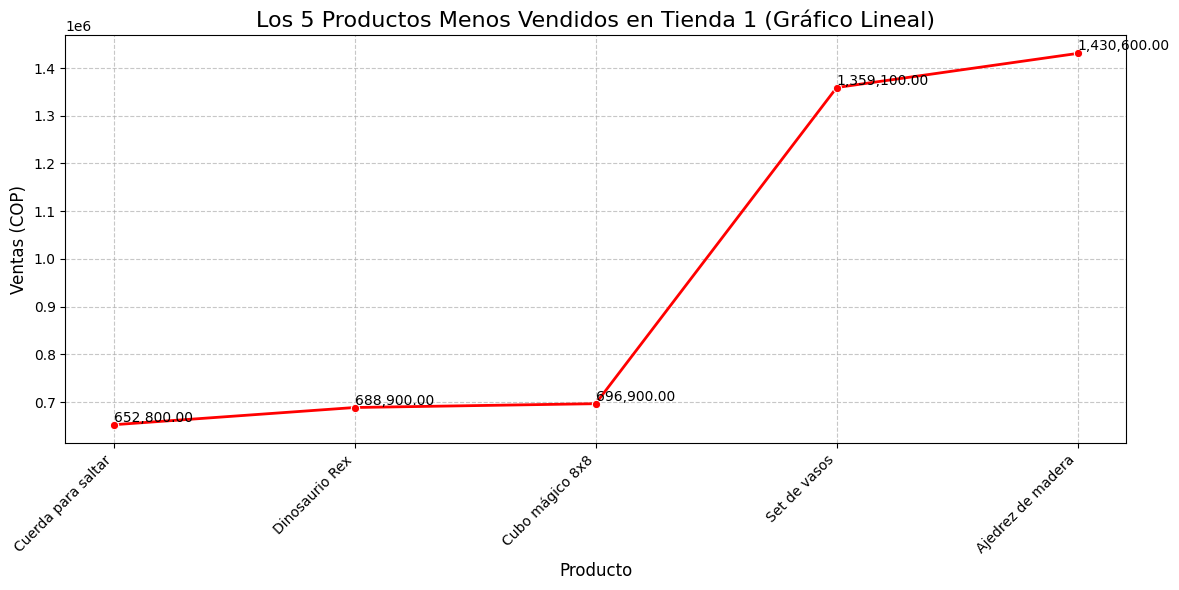

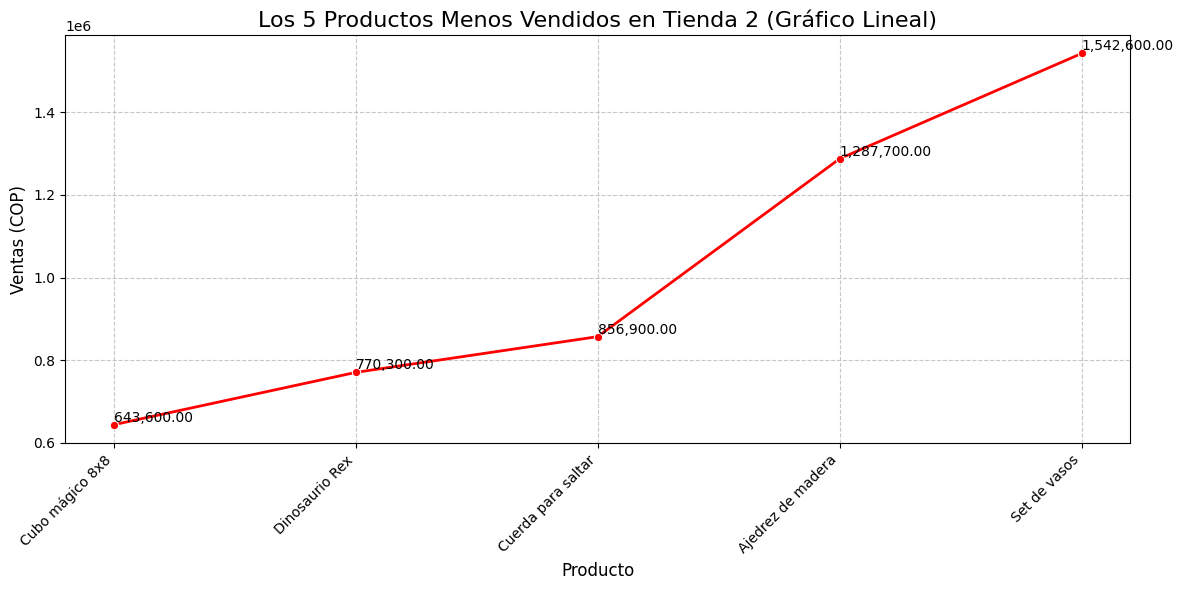

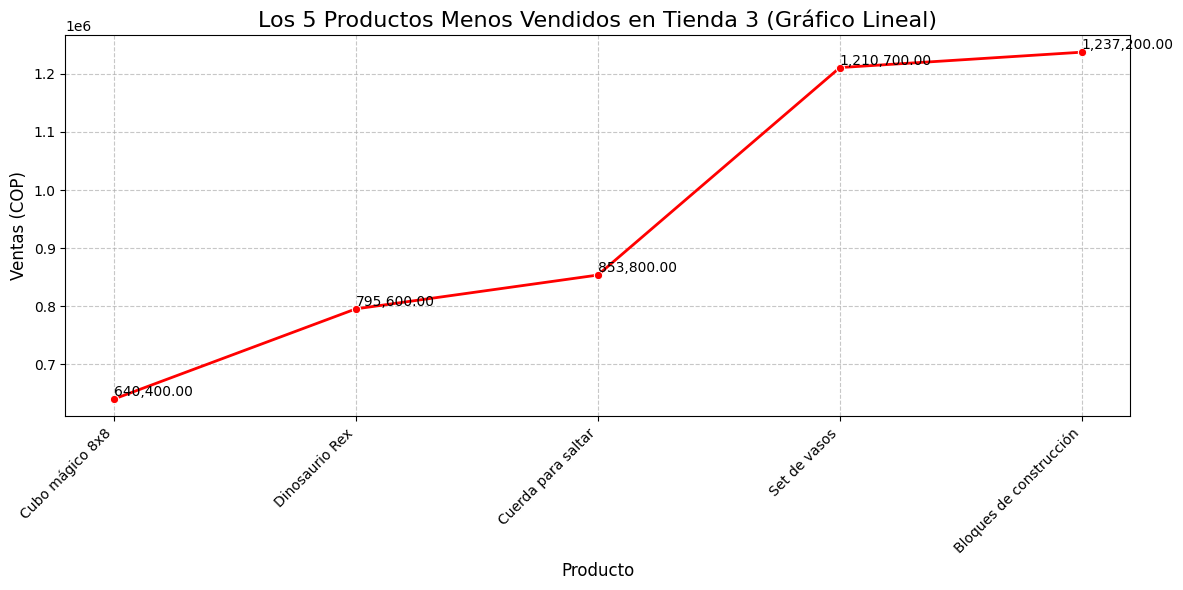

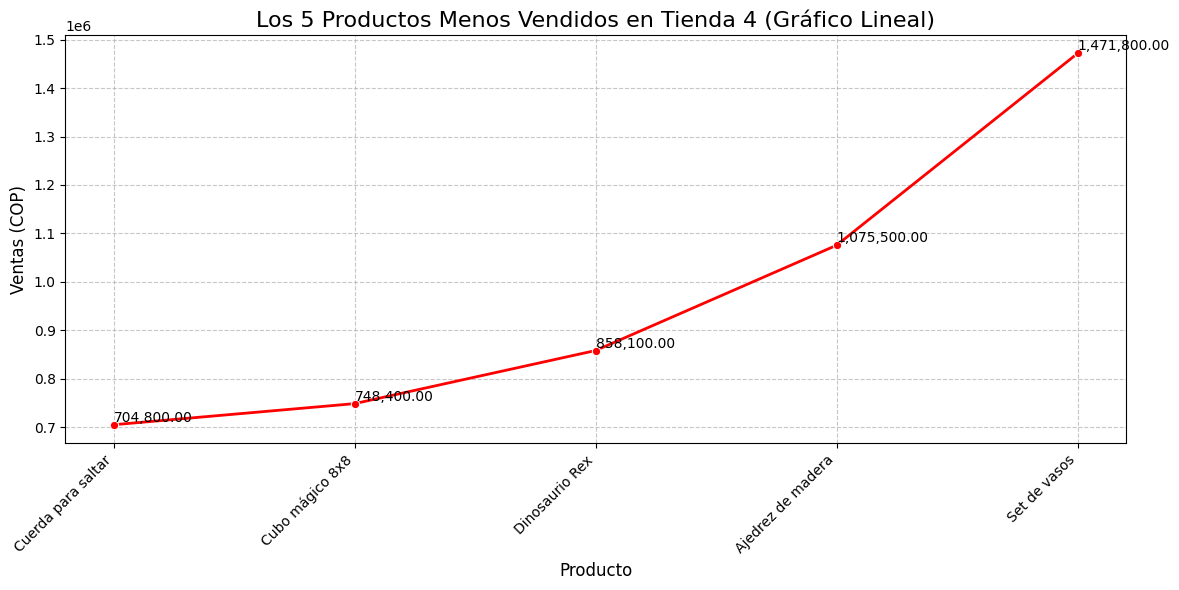

In [15]:
# Función para encontrar los productos más y menos vendidos en una tienda y prepararlos para visualización lineal
def productos_mas_menos_vendidos_line(df, nombre_tienda):
  ventas_por_producto = df.groupby('Producto')['Precio'].sum().reset_index()
  ventas_por_producto = ventas_por_producto.sort_values(by='Precio', ascending=False)

  print(f"\nProductos Más y Menos Vendidos en {nombre_tienda}:")
  print("Productos Más Vendidos (Ordenados de mayor a menor):")
  print(ventas_por_producto.head())  # Top 5 productos más vendidos
  print("\nProductos Menos Vendidos (Ordenados de mayor a menor):")
  print(ventas_por_producto.tail()) # Top 5 productos menos vendidos

  return ventas_por_producto # Devolvemos el dataframe ordenado

# Analizar cada tienda
ventas_productos_tienda1 = productos_mas_menos_vendidos_line(tienda1, 'Tienda 1')
ventas_productos_tienda2 = productos_mas_menos_vendidos_line(tienda2, 'Tienda 2')
ventas_productos_tienda3 = productos_mas_menos_vendidos_line(tienda3, 'Tienda 3')
ventas_productos_tienda4 = productos_mas_menos_vendidos_line(tienda4, 'Tienda 4')

# Función para visualizar los 5 productos más vendidos por tienda en un gráfico lineal
def visualizar_top_productos_line(df_ventas, nombre_tienda, n=5):
  df_top = df_ventas.head(n)
  plt.figure(figsize=(12, 6))
  # Para gráficos de línea con productos, es mejor usar el índice o un rango
  # como eje x si los nombres son muy largos o si solo queremos mostrar la tendencia de los top N.
  # Aquí usaremos los nombres del producto en el eje x.
  ax = sns.lineplot(x='Producto', y='Precio', data=df_top, marker='o', linewidth=2)
  plt.title(f'Top {n} Productos Más Vendidos en {nombre_tienda} (Gráfico Lineal)', fontsize=16)
  plt.xlabel('Producto', fontsize=12)
  plt.ylabel('Ventas (COP)', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(True, linestyle='--', alpha=0.7)

  # Añadir etiquetas de valor a los puntos
  for x, y in zip(df_top['Producto'], df_top['Precio']):
      plt.text(x, y, f'{y:,.2f}', ha='left', va='bottom')


  plt.tight_layout()
  plt.show()

# Visualizar los 5 productos mas vendidos por cada tienda con gráficos de línea
visualizar_top_productos_line(ventas_productos_tienda1, 'Tienda 1')
visualizar_top_productos_line(ventas_productos_tienda2, 'Tienda 2')
visualizar_top_productos_line(ventas_productos_tienda3, 'Tienda 3')
visualizar_top_productos_line(ventas_productos_tienda4, 'Tienda 4')


# Función para visualizar los 5 productos menos vendidos en una tienda en un gráfico lineal
def visualizar_bottom_productos_line(df_ventas, nombre_tienda, n=5):
  df_bottom = df_ventas.tail(n).sort_values(by='Precio', ascending=True) # Ordenar de menor a mayor venta para el gráfico

  plt.figure(figsize=(12, 6))
  # Usar nombres de producto en el eje x
  ax = sns.lineplot(x='Producto', y='Precio', data=df_bottom, marker='o', linewidth=2, color='red')
  plt.title(f'Los {n} Productos Menos Vendidos en {nombre_tienda} (Gráfico Lineal)', fontsize=16)
  plt.xlabel('Producto', fontsize=12)
  plt.ylabel('Ventas (COP)', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(True, linestyle='--', alpha=0.7)

  # Añadir etiquetas de valor a los puntos
  for x, y in zip(df_bottom['Producto'], df_bottom['Precio']):
      plt.text(x, y, f'{y:,.2f}', ha='left', va='bottom')


  plt.tight_layout()
  plt.show()

# Visualizar los 5 productos menos vendidos para cada tienda con gráficos de línea
visualizar_bottom_productos_line(ventas_productos_tienda1, 'Tienda 1')
visualizar_bottom_productos_line(ventas_productos_tienda2, 'Tienda 2')
visualizar_bottom_productos_line(ventas_productos_tienda3, 'Tienda 3')
visualizar_bottom_productos_line(ventas_productos_tienda4, 'Tienda 4')


# 5. Envío promedio por tienda

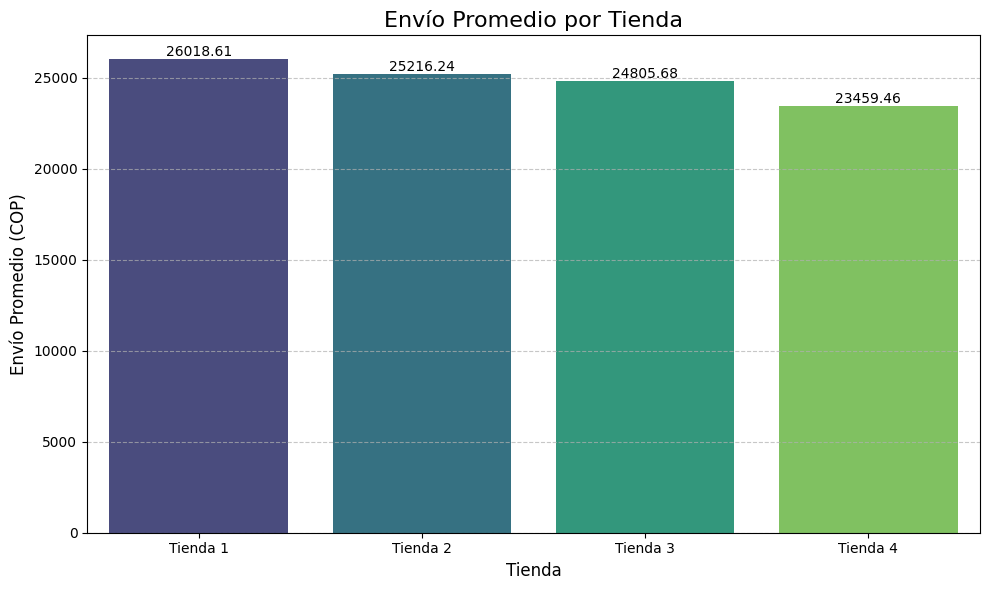


Comparación detallada de envíos promedio:
- Tienda 1: 26018.61 COP
  vs Tienda 2: Diferencia de 802.37 COP
  vs Tienda 3: Diferencia de 1212.93 COP
  vs Tienda 4: Diferencia de 2559.15 COP
- Tienda 2: 25216.24 COP
  vs Tienda 3: Diferencia de 410.56 COP
  vs Tienda 4: Diferencia de 1756.78 COP
- Tienda 3: 24805.68 COP
  vs Tienda 4: Diferencia de 1346.22 COP
- Tienda 4: 23459.46 COP


In [6]:
# Calcular el envío promedio por tienda
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

data_envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Envío Promedio': [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
}

df_envios = pd.DataFrame(data_envios)

# Ordenar por envío promedio de mayor a menor
df_envios_ordenado = df_envios.sort_values(by='Envío Promedio', ascending=False)

# Comparación de cada envío promedio de cada tienda (Visualización)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Envío Promedio', hue='Tienda', data=df_envios_ordenado, palette='viridis')
plt.title('Envío Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Envío Promedio (COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Agregar los valores del envío promedio encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

print("\nComparación detallada de envíos promedio:")
for i in range(len(df_envios_ordenado)):
    tienda_actual = df_envios_ordenado.iloc[i]
    print(f"- {tienda_actual['Tienda']}: {tienda_actual['Envío Promedio']:.2f} COP")
    for j in range(i + 1, len(df_envios_ordenado)):
        tienda_comparada = df_envios_ordenado.iloc[j]
        diferencia = tienda_actual['Envío Promedio'] - tienda_comparada['Envío Promedio']
        print(f"  vs {tienda_comparada['Tienda']}: Diferencia de {diferencia:.2f} COP")



# 6. RECOMENDACION A JOAO SEGUN BENEFICIO POR TIENDA

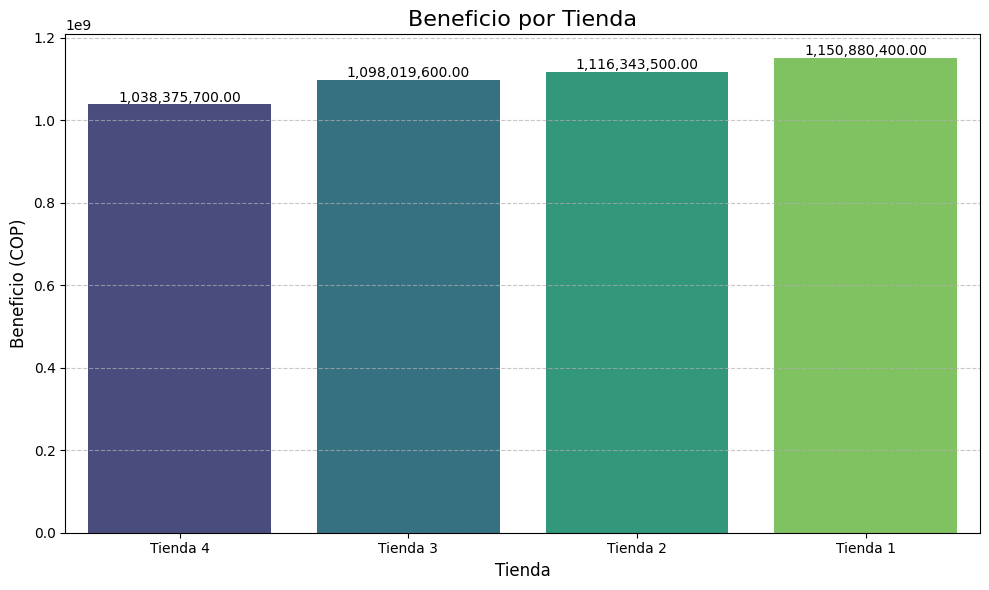

In [4]:
# Benfecio por tienda
beneficio_tienda1 = tienda1['Precio'].sum()
beneficio_tienda2 = tienda2['Precio'].sum()
beneficio_tienda3 = tienda3['Precio'].sum()
beneficio_tienda4 = tienda4['Precio'].sum()

data_beneficio = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Beneficio': [beneficio_tienda1, beneficio_tienda2, beneficio_tienda3, beneficio_tienda4]
}
df_beneficio = pd.DataFrame(data_beneficio)

# Ordenar por beneficio para encontrar el menor y el mayor
df_beneficio_ordenado = df_beneficio.sort_values(by='Beneficio', ascending=True)

tienda_menor_beneficio = df_beneficio_ordenado.iloc[0]
tienda_mayor_beneficio = df_beneficio_ordenado.iloc[-1]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Beneficio', hue='Tienda', data=df_beneficio_ordenado, palette='viridis', legend=False)
plt.title('Beneficio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Beneficio (COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Agregar los valores del beneficio encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


**Recomendación sobre la Venta de Tiendas** <br>
Joao dada la información, la recomendación principal es vender la Tienda 4.

**¿Por qué vender la Tienda 4?** <br>
La lógica detrás de esta recomendación se basa en la optimización de recursos y la rentabilidad. Aquí te detallo los motivos clave:

**Menor Rentabilidad:** La Tienda 4 es la que genera menos beneficios. Al deshacerse de ella, eliminas la carga de mantener una operación que no está contribuyendo significativamente a tus ganancias generales.<br>
**Liberación de Recursos:** Vender la Tienda 4 liberará capital, tiempo y esfuerzo que actualmente se están invirtiendo en una operación de bajo rendimiento. Este capital puede ser reinvertido en las tiendas más rentables (especialmente la Tienda 1) para potenciar su crecimiento y aumentar aún más los beneficios. <br>
**Reducción de Riesgos:** Una tienda con bajos beneficios puede ser más susceptible a fluctuaciones del mercado o a problemas operativos, representando un riesgo para la estabilidad financiera general del negocio. Al venderla, se reduce este riesgo.<br>
**Enfoque Estratégico:** Al eliminar la distracción y el esfuerzo que demanda una tienda de bajo rendimiento, puedes enfocar mejor tu energía y recursos en las tiendas que te están dando mejores resultados. Esto podría significar invertir en marketing, mejorar el inventario, capacitar al personal o expandir las operaciones de la Tienda 1, por ejemplo.<br>

**¿Por qué NO vender la Tienda 1?**<br>
Vender la Tienda 1, que es la más rentable, sería una decisión contraproducente. Es la fuente principal de ingresos y estabilidad del negocio. Deshacerse de ella debilitaría significativamente la posición financiera del hombre y eliminaría su mayor activo generador de valor. La meta debe ser siempre potenciar y proteger lo que más ganancias genera.

